## Generating Random data (4 classes)



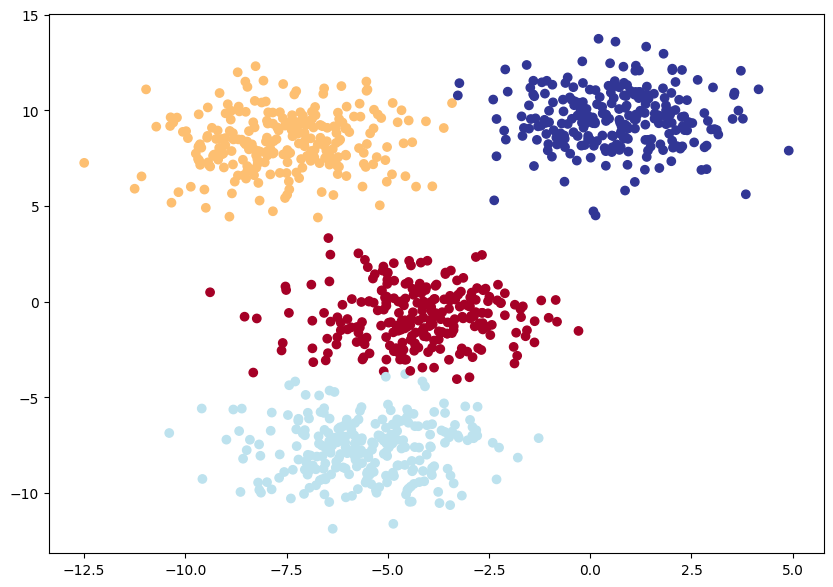

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES
                            ,cluster_std=1.5)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2)


plt.figure(figsize=(10,7))
plt.scatter(x=X_blob[:, 0], y=X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)



## Device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Neural Network Model

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)
    
blobModel = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=blobModel.parameters(), lr=0.1)

In [ ]:
X_blob_train = X_blob_train.to(device) 
X_blob_test = X_blob_test.to(device)  
y_blob_train = y_blob_train.to(device) 
y_blob_test = y_blob_test.to(device) 


In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

## Training loop

In [ ]:
epochs = 1000

for epoch in range(epochs):
  blobModel.train()
  
  logits = blobModel(X_blob_train)
  y_probs = torch.softmax(logits, dim=1)
  y_preds = torch.argmax(y_probs, dim=1)

  loss = loss_fn(logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  

  if epoch % 100 == 0:
    print(f"epoch:{epoch}, Acc: {acc}, Loss: {loss}")



epoch:0, Acc: 24.5, Loss: 1.8147785663604736
epoch:100, Acc: 98.25, Loss: 0.06125372275710106
epoch:200, Acc: 98.75, Loss: 0.04181808978319168
epoch:300, Acc: 99.125, Loss: 0.0328860878944397
epoch:400, Acc: 99.25, Loss: 0.02686724252998829
epoch:500, Acc: 99.375, Loss: 0.02252679504454136
epoch:600, Acc: 99.375, Loss: 0.019408896565437317
epoch:700, Acc: 99.375, Loss: 0.01709485799074173
epoch:800, Acc: 99.5, Loss: 0.015296870842576027
epoch:900, Acc: 99.625, Loss: 0.013859083876013756


## Test data

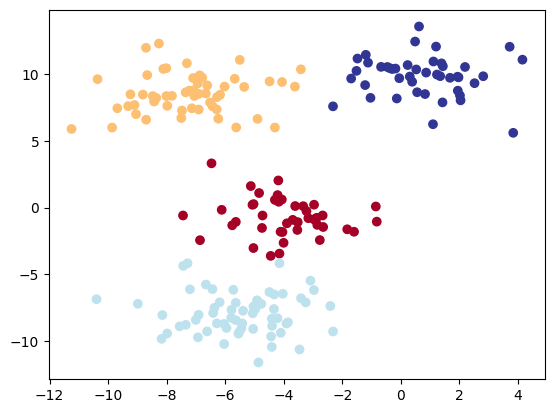

In [ ]:
with torch.inference_mode():
  logits = blobModel(X_blob_test)
  y_probs = torch.softmax(logits, dim=1)
  y_preds = torch.argmax(y_probs, dim=1)


X_blob_train = X_blob_train.cpu()
X_blob_test = X_blob_test.cpu()  
y_blob_train = y_blob_train.cpu()
y_blob_test = y_blob_test.cpu()
y_preds = y_preds.cpu()

plt.scatter(x=X_blob_test[:,0], y=X_blob_test[:,1], c=y_blob_test, cmap=plt.cm.RdYlBu)

## Trained model predictions

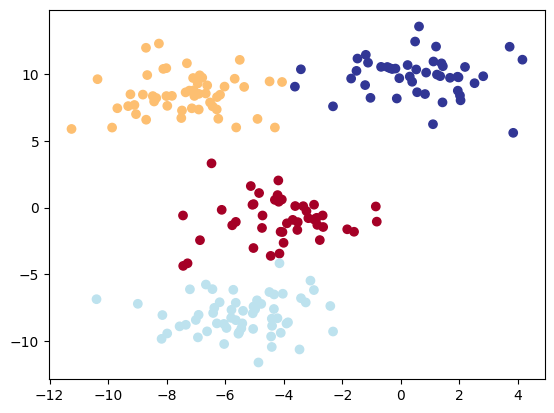

In [33]:
plt.scatter(x=X_blob_test[:,0], y=X_blob_test[:,1], c=y_preds, cmap=plt.cm.RdYlBu)

## Visualization of the model's classification

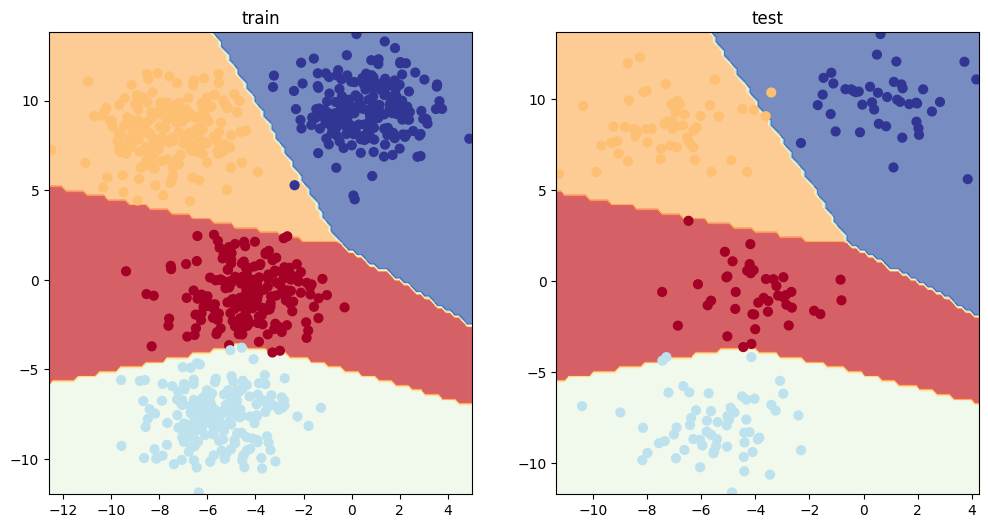

In [32]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(blobModel, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(blobModel,X_blob_test, y_blob_test)